In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ppr.robot import Robot_2P3R,Robot_3R
from ppr.path import TrajectoryPt, TolerancedNumber
from ppr.geometry import Rectangle
from ppr.sampling import cart_to_joint, get_shortest_path

In [2]:
# ROBOT
robot1 = Robot_3R([2, 2, 2])

# PATH
dx    = np.linspace(3, 4, 10)
dy    = TolerancedNumber(1.0, 0.8, 1.2, samples=5)
angle = TolerancedNumber(0.0, -np.pi/2, np.pi/2, samples=10)
path1 = [TrajectoryPt([xi, dy, angle]) for xi in dx]

# COLLISION SCENE
sc1 = [Rectangle(3, 1.3, 2, 1, -0.1),
       Rectangle(3, 0.5, 2, 0.3, 0)]

In [3]:
from ppr.sampling import iterative_bfs

In [4]:
sol2 = iterative_bfs(robot1, path1, sc1, tol=1e-6)

converting type of Q
[24 16 12 10  8  8  4  4  4  4]
converting type of Q
[84  2 42 80  0 14 24 22 20 20]
converting type of Q
[54 96 96 96 18 58 18 58 58 18]
converting type of Q
[84  2  2  2  0 86 46 28 72 10]
converting type of Q
[22 86  8 10 70 12 76 36 16 18]
converting type of Q
[84  2  2  8 82 48  8  0  2 18]
converting type of Q
[80  4  4  8  0  4  4  0  6 18]
converting type of Q
[60  0  2 10  0  0  4  6 14 18]


True


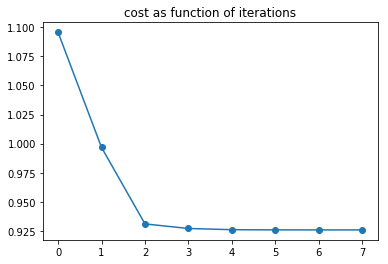

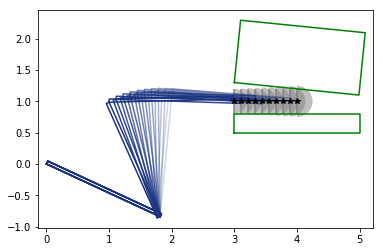

In [5]:
print(sol2['success'])

plt.plot(sol2['length_all_iterations'], 'o-')
plt.title("cost as function of iterations")
plt.show()

fig2, ax2 = plt.subplots()
ax2.axis('equal')
#robot1.plot_path_kinematics(ax2, path_js[2])
robot1.plot_path(ax2, sol2['path'])
for r in sc1: r.plot(ax2, 'g')
for tp in path1: tp.plot(ax2)
plt.show()